# data 01

In [1]:
### Package Import
import sys
import os
base_dir = os.environ['GEMS_HOME']
project_path = os.path.join(base_dir, 'python-refactor')
sys.path.insert(0, project_path)
from Code.utils import matlab

import glob
import numpy as np
import rasterio as rio
from scipy.interpolate import griddata

### Setting path
data_base_dir = os.path.join(project_path, 'Data')
path_read = os.path.join(data_base_dir, 'Preprocessed_raw', 'MODIS', 'MYD13A2', '03mask') 
path_write = os.path.join(data_base_dir, 'Preprocessed_raw', 'EA_GOCI6km', 'MODIS_NDVI')

In [36]:
src = rio.open(os.path.join(data_base_dir, 'Preprocessed_raw', 'MODIS', 'MYD13A2', '03mask', '2016', 'm_MYD13A2_2016_025.tif'))

In [32]:
ndvi = src.read(1)

In [34]:
ndvi/10000

array([[-0.9999,  0.2153,  0.2225, ..., -0.9999, -0.9999, -0.9999],
       [-0.9999,  0.0809,  0.0809, ..., -0.9999, -0.9999, -0.9999],
       [-0.9999,  0.0978,  0.0777, ..., -0.9999, -0.9999, -0.9999],
       ...,
       [-0.9999, -0.9999, -0.9999, ..., -0.9999, -0.9999, -0.9999],
       [-0.9999, -0.9999, -0.9999, ..., -0.9999, -0.9999, -0.9999],
       [-0.9999, -0.9999, -0.9999, ..., -0.9999, -0.9999, -0.9999]])

In [80]:
mat = matlab.loadmat(os.path.join(path_write, '2016', 'EA_MODIS_NDVI_2016_009.mat'))
mat2 = matlab.loadmat('EA_MODIS_NDVI_2016_009.mat')

print (mat['ndvi'].shape)
print (mat2['ndvi'].shape)

print (np.all(mat['ndvi']==mat2['ndvi']))
print (np.all(np.isclose(mat['ndvi'], mat2['ndvi'])))
print (mat['ndvi']==mat2['ndvi'])

(473, 463)
(473, 463)
False
False
[[False False False ... False False False]
 [ True False  True ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [98]:
from rasterio.plot import show

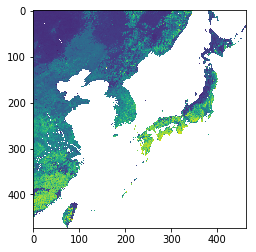

In [99]:
show(mat['ndvi'])

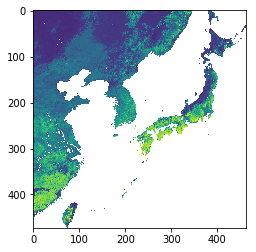

In [100]:
show(mat2['ndvi'])

# data 02

In [126]:
mat = matlab.loadmat(os.path.join(data_base_dir, 'Preprocessed_raw', 'EA_GOCI6km', 'BESS', '2016', 'EA6km_BESS_RSDN_2016_001.mat'))
mat2 = matlab.loadmat('EA6km_BESS_RSDN_2016_001.mat')
arr = mat['RSDN']
arr2 = mat2['RSDN']

print (arr.shape)
print (arr2.shape)

print (np.nanmax(np.abs(arr-arr2)))

print (np.all(arr==arr2))
print (np.all(np.isclose(arr, arr2)))
print (arr==arr2)

(473, 463)
(473, 463)
25.474121137085504
False
False
[[False False False ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [128]:
np.where(~np.isclose(arr, arr2, equal_nan=True))

(array([  0,   0,   0, ..., 471, 472, 472]),
 array([ 5,  8, 20, ..., 74, 73, 76]))

In [129]:
arr[0, 5]

72.12692260806314

In [130]:
arr2[0, 5]

72.1649627692019

In [114]:
np.all(np.isclose(arr, arr2, equal_nan=True))

False

In [127]:
np.isclose(arr, arr2, equal_nan=True)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [138]:
np.nanargmax(np.abs(arr-arr2))

111428

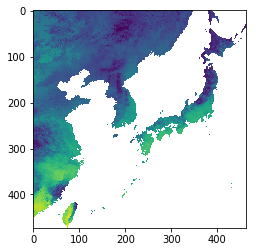

In [131]:
show(arr)

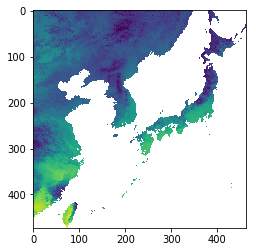

In [132]:
show(arr2)